In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('src/')

In [2]:
# Set a consistent style for the plots
sns.set_theme(style="whitegrid")

In [3]:
# Prefix path
PREFIX_PATH = 'data'

In [4]:
# Set to display all columns
pd.set_option('display.max_columns', None)

# Set to display 50 rows
pd.set_option('display.max_rows', 50)

# Importing the final dataset
df = pd.read_csv(f'{PREFIX_PATH}/final_data_complete.csv')

In [5]:
from utils.methods import conv_to_dict, get_list

In [6]:
temp = pd.DataFrame(list(df['distilbert_emotions'].apply(conv_to_dict)))

In [7]:
emotions_df = pd.concat([df, temp], axis=1)

In [8]:
emotions_df['merge_year'] = emotions_df['merge_year'].astype("Int64")

In [9]:
emotions = ['disgust', 'fear', 'anger', 'neutral', 'sadness', 'surprise', 'joy']

In [10]:
temp = emotions_df.groupby('merge_year').agg({
    emotion: ['mean'] for emotion in emotions
}).reset_index()

In [11]:
temp.columns = ['merge_year'] + emotions

In [12]:
long_df = pd.melt(temp, id_vars=["merge_year"], 
                  var_name="Emotion", 
                  value_name="Value")

In [13]:
long_df

,merge_year,Emotion,Value
0,1888,disgust,NaN
1,1889,disgust,NaN
2,1890,disgust,NaN
3,1891,disgust,NaN
4,1892,disgust,NaN
...,...,...,...
898,2012,joy,0.063128
899,2013,joy,0.062334
900,2014,joy,0.075216
901,2015,joy,NaN


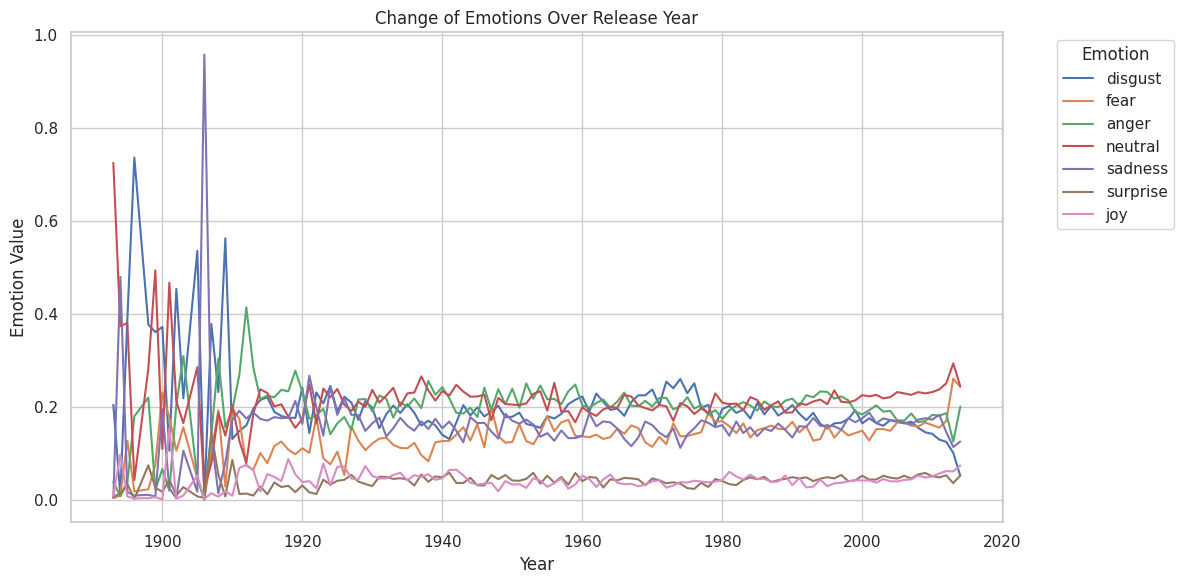

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=long_df, x="merge_year", y="Value", hue="Emotion")
plt.title("Change of Emotions Over Release Year")
plt.xlabel("Year")
plt.ylabel("Emotion Value")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

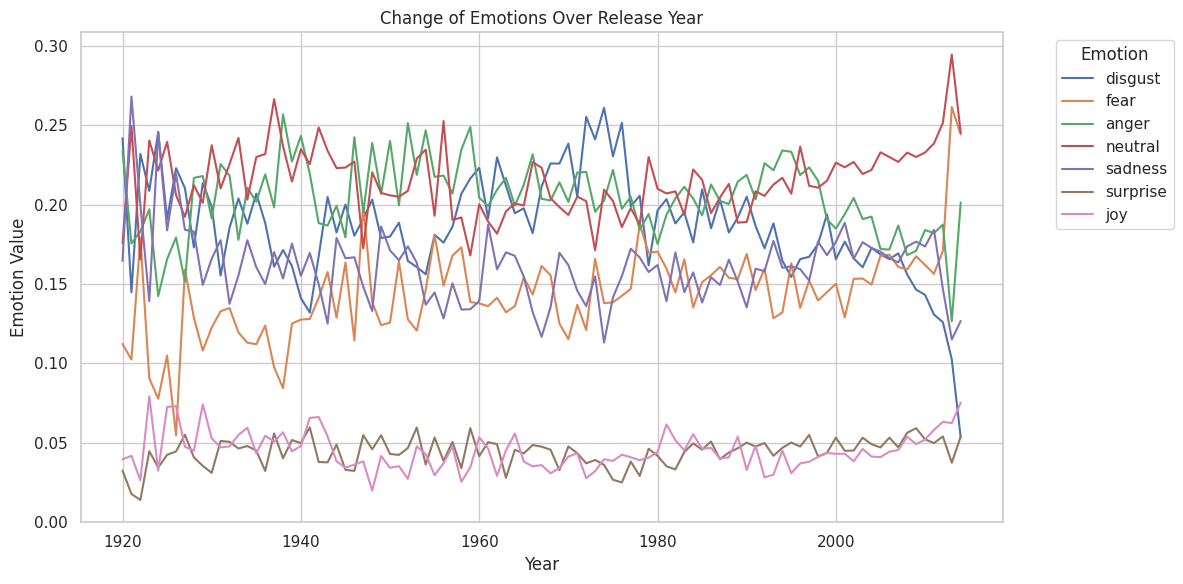

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=long_df[long_df['merge_year'] >= 1920], x="merge_year", y="Value", hue="Emotion")
plt.title("Change of Emotions Over Release Year")
plt.xlabel("Year")
plt.ylabel("Emotion Value")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

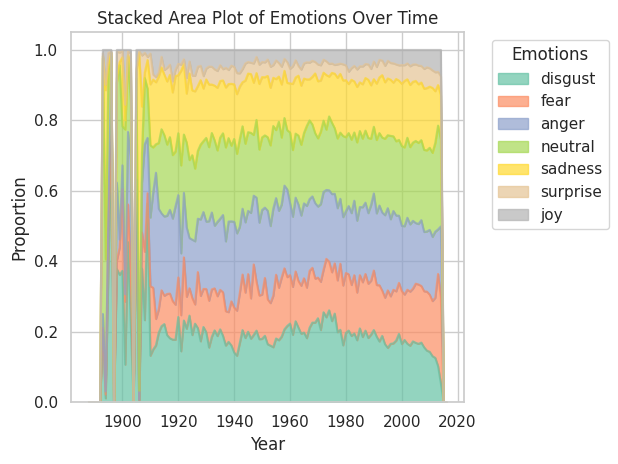

In [16]:
temp.set_index('merge_year', inplace=True)

# Plot the stacked area plot
plt.figure(figsize=(10, 6))
temp.plot.area(stacked=True, cmap='Set2', alpha=0.7)

# Customize the plot
plt.title('Stacked Area Plot of Emotions Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Emotions', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


## Comparison of emotions across genres, including visualizations

maybe instead of using barplots for each genre, plot some histogram with weighted bars?

## Ask TA for which plot is most suitable for the above plots?